### 1. Introduction:
Facebook Followers:

Social media platforms like Facebook provide a myriad of data points about companies such as customer traction, foot traffic, and brand awareness among others. By doing a exploratoty data analysis, I have explored following topics related to these companies:
 
a. Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.\
b. Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.
 

### 2. Read Data

In [1]:
import pandas as pd

df = pd.read_csv('temp_datalab_records_social_facebook.csv')
df.head()

C:\Users\zp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [2]:
df.shape

(3621391, 14)

### 3 Data preprocessing

#### a.check missing values
 entity_id cusip isin are columns of nulls and these can be removed.

In [3]:
print(df.isnull().sum())

dataset_id                   0
time                         0
username                120929
checkins                     0
has_added_app                0
were_here_count              0
likes                        0
talking_about_count          0
facebook_id                  0
date_added             1522285
date_updated              1364
entity_id              3621391
cusip                  3621391
isin                   3621391
dtype: int64


In [4]:
df = df.drop(['entity_id', 'cusip','isin'], axis=1)
print('remove columns: entity_id, cusip and isin')

remove columns: entity_id, cusip and isin


#### b. check the correlation

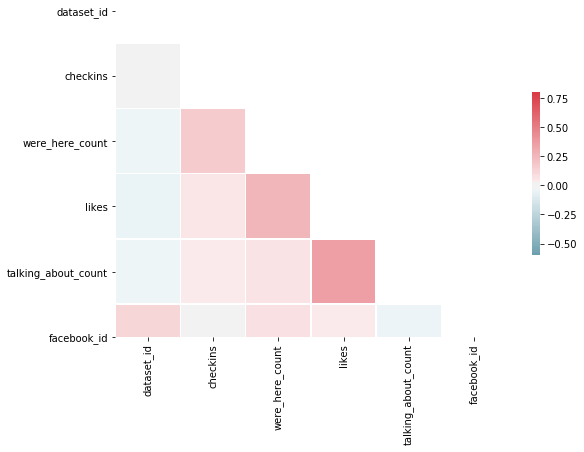

In [5]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# check the correlation
cor = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.8, vmin = -.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In general, features such as likes, were_here_count and checkins are potively correlated to talking_about_count. 

the higher the value is, the higher probability of the label to be 1.

###  4. Exploratory Data Analysis


a. Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.

In [31]:
df_sort_talk_count = df[['username','talking_about_count']]
df_sort_talk_count = df_sort_talk_count.groupby(['username'],as_index=False).mean()
df_sort_talk_count = df_sort_talk_count.sort_values(['talking_about_count'], ascending=0)

In [32]:
print('Companies with highest volatility of “talking about count” are: \n', df_sort_talk_count.username[:10] )

Companies with highest volatility of “talking about count” are: 
 4056    manchesterunited
4921                 wwe
4236             nytimes
446              CBSNews
4810            usatoday
646         CollegeHumor
838                 ESPN
2562            Storyful
4934               yahoo
1882              NYPost
Name: username, dtype: object


b. Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.

In [28]:
#df_sort2 = df.sort_values(['checkins'], ascending=0)
df_sort_checkins = df[['username','checkins']]
df_sort_checkins = df_sort_checkins.groupby(['username'],as_index=False).mean()
df_sort_checkins = df_sort_checkins.sort_values(['checkins'], ascending=0)


In [33]:
print('the winners(first 10) in attracting customers to physical locations are: \n', df_sort_checkins.username[:10] )


the winners(first 10) in attracting customers to physical locations are: 
 788               Disneyland
2904         WaltDisneyWorld
789        DisneylandParisfr
3526         disneylandparis
2669               TheGarden
1649     MadisonSquareGarden
3595     empirestatebuilding
1492         KnottsBerryFarm
2428                SeaWorld
432     BuschGardensTampaBay
Name: username, dtype: object
